### Install and import

In [1]:
%pip install statsmodels

import pandas as pd
import numpy as np

import matplotlib as mlp
import matplotlib.pyplot as plt


from scipy.stats.mstats import spearmanr
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.stats.multicomp as mc
from statsmodels.formula.api import ols

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Load the file (`babblingstats.tsv`) into a `pandas DataFrame`

In [2]:
_FIN = "~/Documents/PhD/Thesis/Catenae/data/babblingstats.tsv"
df = pd.read_csv(_FIN, sep='\t', header=0)

### Convert columns to `float`

In [3]:
cols = df.columns
#cols.remove('catena')
for col in cols[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [4]:
df

,catena,input_freq_01,input_freq_02,input_freq_03,input_freq_04,input_freq_05,input_freq_06,input_freq_07,input_freq_08,input_freq_09,...,babbling_rank_01,babbling_rank_02,babbling_rank_03,babbling_rank_04,babbling_rank_05,babbling_rank_06,babbling_rank_07,babbling_rank_08,babbling_rank_09,babbling_rank_10
0,@nsubj|_AUX|@root,38247.0,38223.0,38508.0,38499.0,38170.0,37492.0,38379.0,38505.0,38565.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,@nsubj|@root,65882.0,65850.0,66203.0,65810.0,65611.0,64831.0,65765.0,66129.0,65778.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,@nsubj|_VERB,62323.0,62703.0,62636.0,62457.0,62406.0,61926.0,62251.0,62689.0,61607.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,_PRON|_AUX|@root,35662.0,35671.0,36003.0,35822.0,35674.0,35178.0,35834.0,36004.0,35775.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,_DET|_NOUN,47456.0,47426.0,47929.0,47688.0,47937.0,47326.0,47867.0,48034.0,47561.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11073,_VERB|@advmod|_VERB|@obl,770.0,846.0,841.0,832.0,829.0,887.0,827.0,844.0,783.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914.0
11074,_AUX|_PART|_VERB|me,443.0,474.0,415.0,431.0,466.0,476.0,432.0,445.0,465.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9979.0
11075,for|_NOUN|@case|@nmod,226.0,243.0,231.0,222.0,222.0,241.0,225.0,218.0,229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9982.0
11076,@root|_NOUN|@amod|@nmod,484.0,509.0,511.0,541.0,553.0,512.0,544.0,492.0,527.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9990.0


In [5]:
len(df["catena"].tolist())

11078

### Have all speakers been exposed to all possible constructions?

We restrict to the set of contructions that all speakers have seen in the input

In [6]:
interesting_cols = [f'input_freq_'+str(i).zfill(2) for i in range(1, 11)]

df = df[~df[interesting_cols].isna().any(axis=1)]

In [7]:
df

,catena,input_freq_01,input_freq_02,input_freq_03,input_freq_04,input_freq_05,input_freq_06,input_freq_07,input_freq_08,input_freq_09,...,babbling_rank_01,babbling_rank_02,babbling_rank_03,babbling_rank_04,babbling_rank_05,babbling_rank_06,babbling_rank_07,babbling_rank_08,babbling_rank_09,babbling_rank_10
0,@nsubj|_AUX|@root,38247.0,38223.0,38508.0,38499.0,38170.0,37492.0,38379.0,38505.0,38565.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,@nsubj|@root,65882.0,65850.0,66203.0,65810.0,65611.0,64831.0,65765.0,66129.0,65778.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,@nsubj|_VERB,62323.0,62703.0,62636.0,62457.0,62406.0,61926.0,62251.0,62689.0,61607.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,_PRON|_AUX|@root,35662.0,35671.0,36003.0,35822.0,35674.0,35178.0,35834.0,36004.0,35775.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,_DET|_NOUN,47456.0,47426.0,47929.0,47688.0,47937.0,47326.0,47867.0,48034.0,47561.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11073,_VERB|@advmod|_VERB|@obl,770.0,846.0,841.0,832.0,829.0,887.0,827.0,844.0,783.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914.0
11074,_AUX|_PART|_VERB|me,443.0,474.0,415.0,431.0,466.0,476.0,432.0,445.0,465.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9979.0
11075,for|_NOUN|@case|@nmod,226.0,243.0,231.0,222.0,222.0,241.0,225.0,218.0,229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9982.0
11076,@root|_NOUN|@amod|@nmod,484.0,509.0,511.0,541.0,553.0,512.0,544.0,492.0,527.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9990.0


In [8]:
len(df["catena"].tolist())

11051

### Add column registering how many speakers share a given Cxn

In [9]:
def compute_speakers(df_row):
    
    speakers = [df_row["babbling_mi_"+str(i).zfill(2)] for i in range(1,11)]
    speakers = [x for x in speakers if not pd.isna(x)]
    
    return len(speakers)

df['speakers'] = df.apply(compute_speakers, axis=1)

/tmp/ipykernel_15593/3518122165.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['speakers'] = df.apply(compute_speakers, axis=1)


### Add column to bin data based on number of speakers

We define:
* `core` - cxns shared by 9 or 10 speakers
* `periphery` - cxns shared by half of the speakers or less
* `other` - cxns with intermediate status (shared by 8, 7 or 6 speakers)

In [10]:
def compute_class(df_row):
    
    ret = "periphery"
    if df_row["speakers"] > 9:
        ret = "core"
    elif df_row["speakers"] > 6:
        ret = "other"    
    
    return ret

df['bin'] = df.apply(compute_class, axis=1)

/tmp/ipykernel_15593/3970997264.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bin'] = df.apply(compute_class, axis=1)


In [11]:
len(df["catena"].tolist())

11051

### Add column recording min frequency for each construction

In [12]:
def min_freq(row):
    m = min([row['input_freq_'+str(i).zfill(2)] for i in range(1, 11)])
    return m

df["input_freq_min"] = df.apply(min_freq, axis=1)

/tmp/ipykernel_15593/3950358101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["input_freq_min"] = df.apply(min_freq, axis=1)


In [13]:
df

,catena,input_freq_01,input_freq_02,input_freq_03,input_freq_04,input_freq_05,input_freq_06,input_freq_07,input_freq_08,input_freq_09,...,babbling_rank_04,babbling_rank_05,babbling_rank_06,babbling_rank_07,babbling_rank_08,babbling_rank_09,babbling_rank_10,speakers,bin,input_freq_min
0,@nsubj|_AUX|@root,38247.0,38223.0,38508.0,38499.0,38170.0,37492.0,38379.0,38505.0,38565.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10,core,37492.0
1,@nsubj|@root,65882.0,65850.0,66203.0,65810.0,65611.0,64831.0,65765.0,66129.0,65778.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10,core,64831.0
2,@nsubj|_VERB,62323.0,62703.0,62636.0,62457.0,62406.0,61926.0,62251.0,62689.0,61607.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,10,core,61607.0
3,_PRON|_AUX|@root,35662.0,35671.0,36003.0,35822.0,35674.0,35178.0,35834.0,36004.0,35775.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,10,core,35178.0
4,_DET|_NOUN,47456.0,47426.0,47929.0,47688.0,47937.0,47326.0,47867.0,48034.0,47561.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,10,core,47326.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11073,_VERB|@advmod|_VERB|@obl,770.0,846.0,841.0,832.0,829.0,887.0,827.0,844.0,783.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9914.0,1,periphery,770.0
11074,_AUX|_PART|_VERB|me,443.0,474.0,415.0,431.0,466.0,476.0,432.0,445.0,465.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9979.0,1,periphery,415.0
11075,for|_NOUN|@case|@nmod,226.0,243.0,231.0,222.0,222.0,241.0,225.0,218.0,229.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9982.0,1,periphery,218.0
11076,@root|_NOUN|@amod|@nmod,484.0,509.0,511.0,541.0,553.0,512.0,544.0,492.0,527.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9990.0,1,periphery,484.0


### Is input frequency related to rank?

For each speaker, we check whether the rank of a certain construction (sorted by decreasing MI) correlates with the frequency in which that construction appears in the input

In [14]:
print("speaker\tstat\tp value")

for i in range(1, 11):
    i = str(i).zfill(2)
    
    input_column = df[f'input_freq_{i}'][df[f'babbling_rank_{i}'].notna()]
    babbling_column = df[ f'babbling_rank_{i}'][df[f'babbling_rank_{i}'].notna()]
    
    s, p_s = spearmanr(input_column, babbling_column)

    
    print(f'{i}\t{s:.4f}\t{p_s:.3f}')

speaker	stat	p value
01	-0.7483	0.000
02	-0.7552	0.000
03	-0.7467	0.000
04	-0.7477	0.000
05	-0.7499	0.000
06	-0.7502	0.000
07	-0.7485	0.000
08	-0.7480	0.000
09	-0.7449	0.000
10	-0.7514	0.000


### Are core constructions also the most frequent ones?

We check whether there's a significant difference in the input frequencies (in log scale) among the three groups of constructions (core, peripherial and other cxns)

In [15]:
# Compute log of frequencies

log_df = df.copy()

for i in range(1, 11):
    i = str(i).zfill(2)
    log_df[f'input_freq_{i}'] =  np.log2(log_df[f'input_freq_{i}'])
    
log_df["input_freq_min"] = np.log2(log_df[f'input_freq_min'])

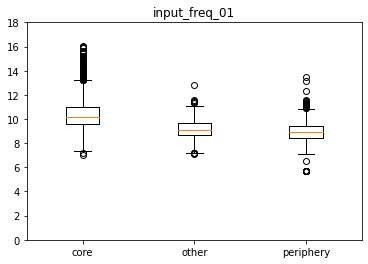

                sum_sq       df           F  PR(>F)
C(bin)     3108.841586      2.0  1262.36534     0.0
Residual  13604.018094  11048.0         NaN     NaN

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj  lower   upper  reject
------------------------------------------------------
  core     other  -1.2215  -0.0  -1.325 -1.1179   True
  core periphery  -1.4655  -0.0 -1.5429  -1.388   True
 other periphery   -0.244   0.0 -0.3674 -0.1206   True
------------------------------------------------------



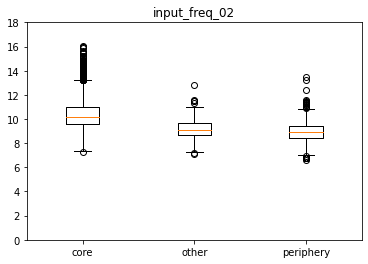

                sum_sq       df            F  PR(>F)
C(bin)     3079.699261      2.0  1263.403097     0.0
Residual  13465.424261  11048.0          NaN     NaN

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  core     other  -1.2335   -0.0 -1.3365 -1.1305   True
  core periphery   -1.451   -0.0 -1.5281 -1.3739   True
 other periphery  -0.2175 0.0001 -0.3403 -0.0947   True
-------------------------------------------------------



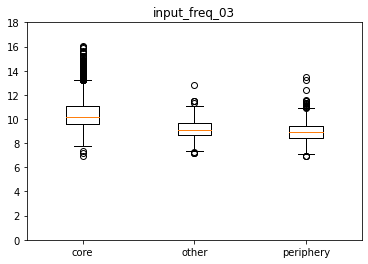

                sum_sq       df            F  PR(>F)
C(bin)     2987.526114      2.0  1248.318508     0.0
Residual  13220.259207  11048.0          NaN     NaN

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  core     other  -1.2256   -0.0 -1.3277 -1.1235   True
  core periphery  -1.4245   -0.0 -1.5008 -1.3481   True
 other periphery  -0.1989 0.0004 -0.3206 -0.0772   True
-------------------------------------------------------



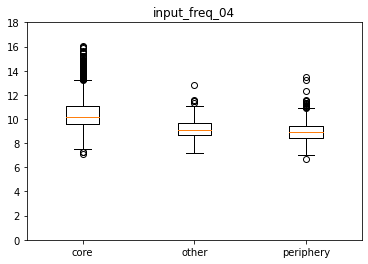

                sum_sq       df            F  PR(>F)
C(bin)     3025.389633      2.0  1252.184602     0.0
Residual  13346.476474  11048.0          NaN     NaN

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  core     other  -1.2298   -0.0 -1.3324 -1.1272   True
  core periphery   -1.435   -0.0 -1.5117 -1.3583   True
 other periphery  -0.2052 0.0002 -0.3275  -0.083   True
-------------------------------------------------------



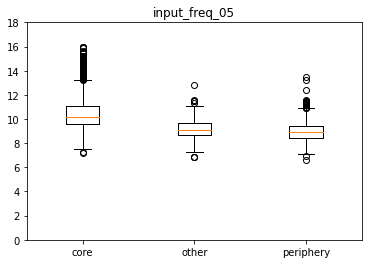

                sum_sq       df            F  PR(>F)
C(bin)     3061.140976      2.0  1258.478644     0.0
Residual  13436.654511  11048.0          NaN     NaN

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  core     other  -1.2373   -0.0 -1.3403 -1.1344   True
  core periphery  -1.4433   -0.0 -1.5203 -1.3663   True
 other periphery   -0.206 0.0002 -0.3287 -0.0833   True
-------------------------------------------------------



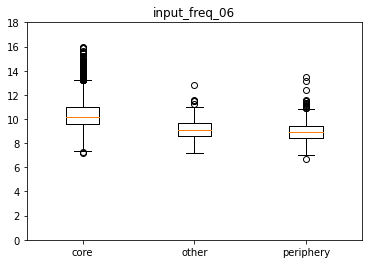

                sum_sq       df            F  PR(>F)
C(bin)     3028.235452      2.0  1251.010904     0.0
Residual  13371.564218  11048.0          NaN     NaN

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  core     other   -1.242   -0.0 -1.3447 -1.1394   True
  core periphery  -1.4305   -0.0 -1.5074 -1.3537   True
 other periphery  -0.1885 0.0009 -0.3109 -0.0661   True
-------------------------------------------------------



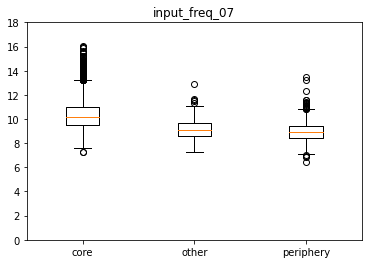

                sum_sq       df            F  PR(>F)
C(bin)     2970.268699      2.0  1221.805567     0.0
Residual  13429.112401  11048.0          NaN     NaN

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  core     other  -1.2275   -0.0 -1.3304 -1.1246   True
  core periphery  -1.4179   -0.0 -1.4949  -1.341   True
 other periphery  -0.1904 0.0008 -0.3131 -0.0678   True
-------------------------------------------------------



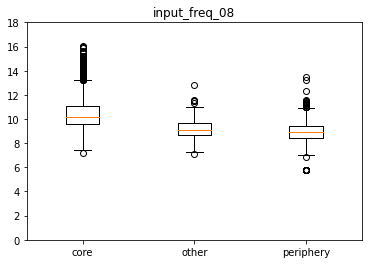

                sum_sq       df            F  PR(>F)
C(bin)     3150.381509      2.0  1283.252094     0.0
Residual  13561.409745  11048.0          NaN     NaN

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj  lower   upper  reject
------------------------------------------------------
  core     other  -1.2288  -0.0 -1.3322 -1.1254   True
  core periphery  -1.4755  -0.0 -1.5529 -1.3982   True
 other periphery  -0.2467   0.0   -0.37 -0.1235   True
------------------------------------------------------



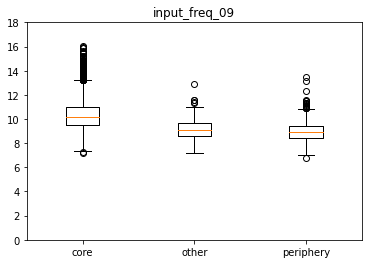

                sum_sq       df            F  PR(>F)
C(bin)     3059.613124      2.0  1252.081967     0.0
Residual  13498.559469  11048.0          NaN     NaN

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  core     other  -1.2368   -0.0 -1.3399 -1.1336   True
  core periphery  -1.4431   -0.0 -1.5202 -1.3659   True
 other periphery  -0.2063 0.0002 -0.3293 -0.0833   True
-------------------------------------------------------



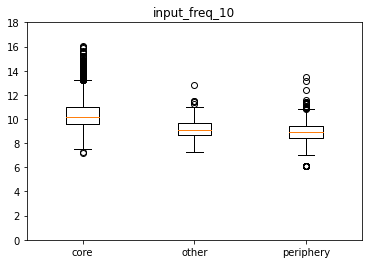

                sum_sq       df            F  PR(>F)
C(bin)     3095.172042      2.0  1258.927862     0.0
Residual  13581.183541  11048.0          NaN     NaN

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj  lower   upper  reject
------------------------------------------------------
  core     other  -1.2253  -0.0 -1.3288 -1.1219   True
  core periphery  -1.4594  -0.0 -1.5369  -1.382   True
 other periphery  -0.2341   0.0 -0.3574 -0.1108   True
------------------------------------------------------



In [16]:
for i in range(1, 11):
    i = str(i).zfill(2)

    core = log_df[f'input_freq_{i}'][log_df['bin'] == "core"]
    other = log_df[f'input_freq_{i}'][log_df['bin'] == "other"]
    periphery = log_df[f'input_freq_{i}'][log_df['bin'] == "periphery"]

    # plot boxes
    fig, ax = plt.subplots()
    ax.set_title(f'input_freq_{i}')
    ax.boxplot([core, other, periphery])
    ax.set_ylim(0, 18)
    ax.set_xticklabels(["core", "other", "periphery"])
    plt.show()
    
    # compute ANOVA
    model = ols(f'input_freq_{i} ~ C(bin)', data=log_df).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    print(aov_table)
    print()
    
    # compute Tukey's posthoc
    comp = mc.MultiComparison(log_df[f'input_freq_{i}'], log_df['bin'])
    post_hoc_res = comp.tukeyhsd()
    print(post_hoc_res.summary())
    print()


The distributions shown above seem to have a lot of outliers. How come peripheral constructions can have such high frequency and core constructions can have such low frequency? We want to check if it is the case that, for instance, the peripheral constructions, that are shared by 5 speakers, don't have particularly frequency for those 5 speakers.

To check that, we compute boxplots and anova also for the minimum registered input frequency.

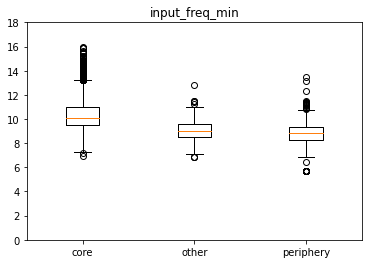

                sum_sq       df            F  PR(>F)
C(bin)     3309.417504      2.0  1294.953956     0.0
Residual  14117.275910  11048.0          NaN     NaN

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj  lower   upper  reject
------------------------------------------------------
  core     other  -1.2638  -0.0 -1.3693 -1.1583   True
  core periphery  -1.5105  -0.0 -1.5894 -1.4316   True
 other periphery  -0.2467   0.0 -0.3724 -0.1209   True
------------------------------------------------------



In [17]:
core = log_df[f'input_freq_min'][log_df['bin'] == "core"]
other = log_df[f'input_freq_min'][log_df['bin'] == "other"]
periphery = log_df[f'input_freq_min'][log_df['bin'] == "periphery"]

    
fig, ax = plt.subplots()
ax.set_title(f'input_freq_min')
ax.boxplot([core, other, periphery])
ax.set_ylim(0, 18)
ax.set_xticklabels(["core", "other", "periphery"])
plt.show()

    
model = ols('input_freq_min ~ C(bin)', data=log_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)
print()
    
comp = mc.MultiComparison(log_df[f'input_freq_min'], log_df['bin'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())
print()

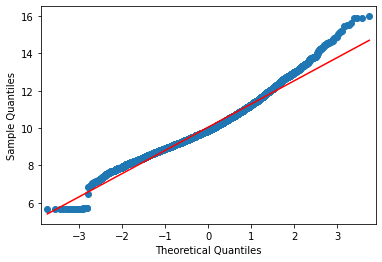

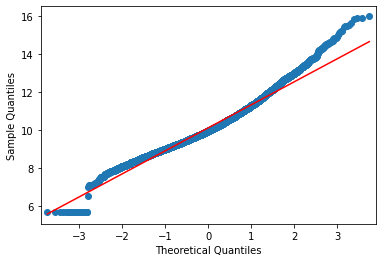

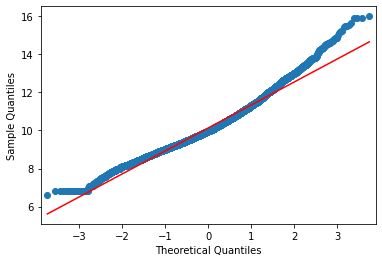

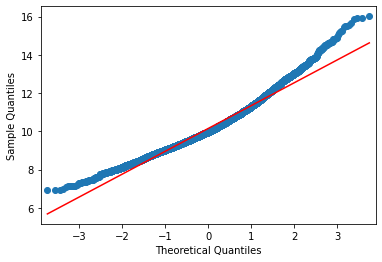

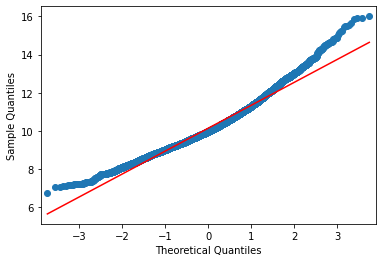

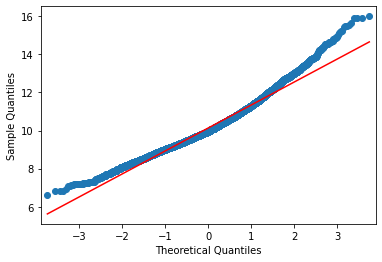

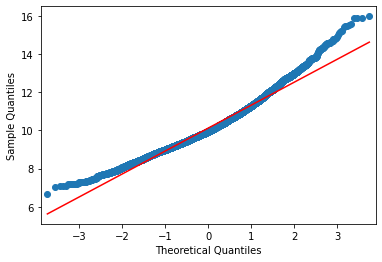

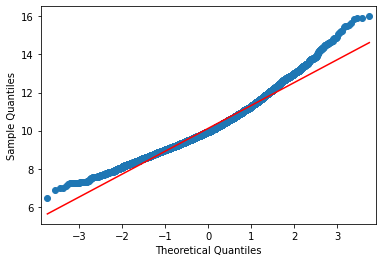

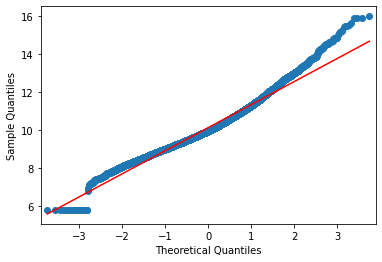

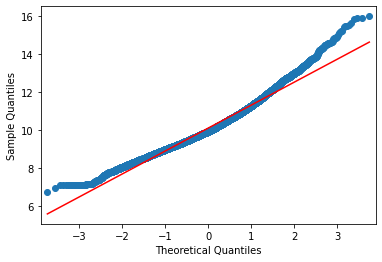

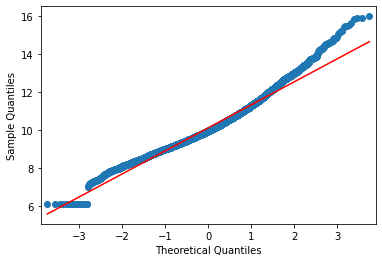

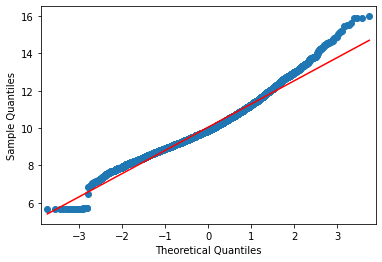

In [18]:
# Check that logs are normally distributed

for i in range(1, 11):
    i = str(i).zfill(2)
    
    sm.qqplot(log_df[f'input_freq_{i}'], line="r")
    
sm.qqplot(log_df[f'input_freq_min'], line="r")

### Pairwise input frequency and rank correlations

In [19]:
for i in range(1, 11):
    
    for j in range(i+1, 11):
    
        i = str(i).zfill(2)
        j = str(j).zfill(2)

        s_f, p_s_f = spearmanr(df[f'input_freq_{i}'], df[f'input_freq_{j}'], nan_policy='propagate')
        s_r, p_s_r = spearmanr(df[f'babbling_rank_{i}'], df[f'babbling_rank_{j}'], nan_policy='propagate')

        print(i, j, "\t", "{:.3f}".format(s_f), p_s_f, "\t",  "{:.3f}".format(s_r), p_s_r)
    print()

01 02 	 0.998 0.0 	 0.986 0.0
01 03 	 0.998 0.0 	 0.984 0.0
01 04 	 0.998 0.0 	 0.987 0.0
01 05 	 0.997 0.0 	 0.984 0.0
01 06 	 0.998 0.0 	 0.984 0.0
01 07 	 0.998 0.0 	 0.983 0.0
01 08 	 0.998 0.0 	 0.991 0.0
01 09 	 0.997 0.0 	 0.981 0.0
01 10 	 0.997 0.0 	 0.989 0.0

02 03 	 0.998 0.0 	 0.980 0.0
02 04 	 0.998 0.0 	 0.987 0.0
02 05 	 0.998 0.0 	 0.985 0.0
02 06 	 0.998 0.0 	 0.981 0.0
02 07 	 0.997 0.0 	 0.981 0.0
02 08 	 0.998 0.0 	 0.988 0.0
02 09 	 0.997 0.0 	 0.978 0.0
02 10 	 0.997 0.0 	 0.989 0.0

03 04 	 0.998 0.0 	 0.987 0.0
03 05 	 0.997 0.0 	 0.988 0.0
03 06 	 0.997 0.0 	 0.983 0.0
03 07 	 0.998 0.0 	 0.985 0.0
03 08 	 0.998 0.0 	 0.988 0.0
03 09 	 0.997 0.0 	 0.986 0.0
03 10 	 0.998 0.0 	 0.985 0.0

04 05 	 0.998 0.0 	 0.987 0.0
04 06 	 0.997 0.0 	 0.984 0.0
04 07 	 0.998 0.0 	 0.985 0.0
04 08 	 0.998 0.0 	 0.990 0.0
04 09 	 0.997 0.0 	 0.985 0.0
04 10 	 0.998 0.0 	 0.989 0.0

05 06 	 0.998 0.0 	 0.984 0.0
05 07 	 0.998 0.0 	 0.986 0.0
05 08 	 0.998 0.0 	 0.989 0.0
05 09 

### Finding distribution outliers

We want to find:
* low frequency `core` constructions
* high frequency `peripheral` constructions

In [20]:
# for legibility, define core and peripheral constructions separately

core = log_df[log_df["bin"]=="core"]
periphery = log_df[log_df["bin"]=="periphery"]

In [21]:
core

,catena,input_freq_01,input_freq_02,input_freq_03,input_freq_04,input_freq_05,input_freq_06,input_freq_07,input_freq_08,input_freq_09,...,babbling_rank_04,babbling_rank_05,babbling_rank_06,babbling_rank_07,babbling_rank_08,babbling_rank_09,babbling_rank_10,speakers,bin,input_freq_min
0,@nsubj|_AUX|@root,15.223059,15.222153,15.232871,15.232533,15.220152,15.194295,15.228030,15.232758,15.235004,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,10,core,15.194295
1,@nsubj|@root,16.007597,16.006896,16.014609,16.006019,16.001650,15.984396,16.005032,16.012995,16.005318,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,10,core,15.984396
2,@nsubj|_VERB,15.927477,15.936247,15.934704,15.930576,15.929397,15.918258,15.925809,15.935925,15.910807,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,10,core,15.910807
3,_PRON|_AUX|@root,15.122100,15.122464,15.135830,15.128558,15.122585,15.102386,15.129041,15.135870,15.126664,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,10,core,15.102386
4,_DET|_NOUN,15.534303,15.533391,15.548611,15.541339,15.548852,15.530345,15.546744,15.551768,15.537491,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,10,core,15.530345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9933,_ADP|me,10.508785,10.580259,10.554589,10.546894,10.601771,10.567956,10.528454,10.515700,10.543998,...,9705.0,8722.0,8499.0,9037.0,8999.0,8691.0,8971.0,10,core,10.508785
9964,_SCONJ|_PRON|@advcl|@xcomp,8.503826,8.539159,8.686501,8.569856,8.507795,8.550747,8.550747,8.543032,8.558421,...,9276.0,9950.0,9898.0,9752.0,9788.0,9782.0,9036.0,10,core,8.434628
9965,@aux|you|_VERB|@xcomp,8.957102,8.912889,8.930737,8.942515,8.854868,8.876517,8.965784,8.962896,8.924813,...,9057.0,9155.0,9589.0,9085.0,9183.0,8218.0,9132.0,10,core,8.854868
9974,let|'s|go,8.224002,8.317413,8.375039,8.280771,8.108524,8.129283,8.422065,8.308339,8.209453,...,8507.0,9985.0,7618.0,7803.0,8660.0,8150.0,8041.0,10,core,8.108524


In [22]:
periphery

,catena,input_freq_01,input_freq_02,input_freq_03,input_freq_04,input_freq_05,input_freq_06,input_freq_07,input_freq_08,input_freq_09,...,babbling_rank_04,babbling_rank_05,babbling_rank_06,babbling_rank_07,babbling_rank_08,babbling_rank_09,babbling_rank_10,speakers,bin,input_freq_min
7738,_NUM|of|@nmod,8.588715,8.614710,8.511753,8.459432,8.348728,8.543032,8.252665,8.455327,8.495855,...,9088.0,NaN,9211.0,NaN,NaN,9184.0,9873.0,6,periphery,8.252665
8129,one|of|@nmod,8.339850,8.330917,8.233620,8.204571,8.098032,8.303781,8.038919,8.243174,8.179909,...,9447.0,NaN,9423.0,NaN,NaN,9624.0,NaN,5,periphery,8.038919
8172,take|@obj|_ADP|@obl,8.584963,8.566054,8.531381,8.321928,8.527477,8.447083,8.463524,8.539159,8.573647,...,NaN,9311.0,9005.0,NaN,8526.0,NaN,NaN,6,periphery,8.321928
8323,take|@obj|@case|@obl,8.535275,8.507795,8.487840,8.238405,8.483816,8.405141,8.426265,8.495855,8.503826,...,NaN,9533.0,9324.0,NaN,8723.0,NaN,NaN,6,periphery,8.238405
8368,_PRON|'re|going|@xcomp,7.554589,7.321928,7.554589,7.285402,7.118941,7.276124,7.375039,7.499846,7.238405,...,NaN,NaN,NaN,NaN,9117.0,NaN,NaN,3,periphery,7.118941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11073,_VERB|@advmod|_VERB|@obl,9.588715,9.724514,9.715962,9.700440,9.695228,9.792790,9.691744,9.721099,9.612868,...,NaN,NaN,NaN,NaN,NaN,NaN,9914.0,1,periphery,9.588715
11074,_AUX|_PART|_VERB|me,8.791163,8.888743,8.696968,8.751544,8.864186,8.894818,8.754888,8.797662,8.861087,...,NaN,NaN,NaN,NaN,NaN,NaN,9979.0,1,periphery,8.696968
11075,for|_NOUN|@case|@nmod,7.820179,7.924813,7.851749,7.794416,7.794416,7.912889,7.813781,7.768184,7.839204,...,NaN,NaN,NaN,NaN,NaN,NaN,9982.0,1,periphery,7.768184
11076,@root|_NOUN|@amod|@nmod,8.918863,8.991522,8.997179,9.079485,9.111136,9.000000,9.087463,8.942515,9.041659,...,NaN,NaN,NaN,NaN,NaN,NaN,9990.0,1,periphery,8.918863


In [23]:
d = {}
overall_list = set()

for i in range(1, 11):
    i = str(i).zfill(2)
    
    q75 = core[f"input_freq_{i}"].quantile(0.75) # 1st quartile
    q25 = core[f"input_freq_{i}"].quantile(0.25) # 3rd quartile
    iqr = stats.iqr(core[f"input_freq_{i}"]) # interquartile range

    upper_limit = q75 + 1.5 * iqr
    lower_limit = q25 - 1.5 * iqr
    
    core_low_freq = core[core[f"input_freq_{i}"]<=lower_limit]["catena"]
    
    d[i] = set(core_low_freq)
    overall_list = overall_list.union(d[i])
    
    print (i, f"\tupper limit: {upper_limit:.3f}\t", f"lower limit: {lower_limit:.3f}\t", "outliers: {}".format(len(d[i])))

print()
print("How many constructions are outliers for some speaker? {}".format(len(overall_list)))

01 	upper limit: 13.254	 lower limit: 7.320	 outliers: 2
02 	upper limit: 13.241	 lower limit: 7.343	 outliers: 1
03 	upper limit: 13.234	 lower limit: 7.377	 outliers: 3
04 	upper limit: 13.268	 lower limit: 7.330	 outliers: 3
05 	upper limit: 13.260	 lower limit: 7.334	 outliers: 2
06 	upper limit: 13.235	 lower limit: 7.334	 outliers: 2
07 	upper limit: 13.225	 lower limit: 7.328	 outliers: 2
08 	upper limit: 13.258	 lower limit: 7.354	 outliers: 1
09 	upper limit: 13.226	 lower limit: 7.327	 outliers: 2
10 	upper limit: 13.232	 lower limit: 7.336	 outliers: 2

How many constructions are outliers for some speaker? 3


In [24]:
# find how many speakers have a specific construction as an outlier
shared = {}
for cxn in overall_list:
    shared[cxn] = sum(1 if cxn in s else 0 for s in d.values())

# these are in the core group but have low frequency in input for n speakers
for cxn, n in sorted(shared.items(), key=lambda x: -x[1]):
    print(n, "\t", cxn)

9 	 a|lot|of|@nmod
9 	 gon|na|be|@xcomp
2 	 's|gon|na|@xcomp


In [25]:
d = {}
overall_list = set()

for i in range(1, 11):
    i = str(i).zfill(2)
    
    q75 = periphery[f"input_freq_{i}"].quantile(0.75) # 1st quartile
    q25 = periphery[f"input_freq_{i}"].quantile(0.25) # 3rd quartile
    iqr = stats.iqr(periphery[f"input_freq_{i}"]) # interquartile range
    
    upper_limit = q75 + 1.5 * iqr
    lower_limit = q25 - 1.5 * iqr
    
    periphery_high_freq = periphery[periphery[f"input_freq_{i}"]>=upper_limit]["catena"]
 
    d[i] = set(periphery_high_freq)
    overall_list = overall_list.union(d[i])
    
    print (i, f"\tupper limit: {upper_limit:.3f}\t", f"lower limit: {lower_limit:.3f}\t", "outliers: {}".format(len(d[i])))

print()
print("How many constructions are outliers for some speaker? {}".format(len(overall_list)))

01 	upper limit: 10.853	 lower limit: 7.004	 outliers: 18
02 	upper limit: 10.894	 lower limit: 6.985	 outliers: 17
03 	upper limit: 10.908	 lower limit: 6.987	 outliers: 17
04 	upper limit: 10.929	 lower limit: 6.904	 outliers: 17
05 	upper limit: 10.927	 lower limit: 6.936	 outliers: 16
06 	upper limit: 10.902	 lower limit: 6.907	 outliers: 17
07 	upper limit: 10.811	 lower limit: 7.026	 outliers: 20
08 	upper limit: 10.914	 lower limit: 6.947	 outliers: 18
09 	upper limit: 10.874	 lower limit: 6.938	 outliers: 18
10 	upper limit: 10.856	 lower limit: 6.958	 outliers: 19

How many constructions are outliers for some speaker? 21


In [26]:
# find how many speakers have a specific construction as an outlier
shared = {}
for cxn in overall_list:
    shared[cxn] = sum(1 if cxn in s else 0 for s in d.values())

# these are in the pheriphery group but have high frequency in input for n speakers
for cxn, n in sorted(shared.items(), key=lambda x: -x[1]):
    print(n, "\t", cxn)

10 	 _PRON|_ADJ
10 	 @nsubj|@case|_NOUN
10 	 _NOUN|@nsubj|_VERB|_NOUN
10 	 have|_NOUN
10 	 _PRON|the|_NOUN
10 	 _DET|@root|_NOUN
10 	 _VERB|_NOUN|@obj
10 	 _AUX|_NOUN
10 	 _VERB|you
10 	 _PRON|@root|you
10 	 _VERB|@obl|_VERB
10 	 _NOUN|_PRON|_AUX|_VERB
10 	 _VERB|@advmod|_ADV
10 	 @root|@obj|@advmod
10 	 @root|_NOUN|_PRON|_VERB
10 	 _NOUN|_VERB|_NOUN|_NOUN
9 	 _PRON|_AUX|_PRON|_VERB
5 	 _AUX|@root|you
1 	 _NOUN|@cop|_ADJ
1 	 @nsubj|_VERB|_PRON|_ADV
1 	 @det|@nsubj|_VERB|_NOUN


### Print core and pheriphery Cxn

In [27]:
len(core["catena"].tolist())

9086

In [28]:
len(periphery["catena"].tolist())

1287

In [29]:
with open("../data/catenae-core-glass.txt", "w") as fout:
    print("\n".join(core["catena"].tolist()), file=fout)
    
with open("../data/catenae-periphery-glass.txt", "w") as fout:
    print("\n".join(periphery["catena"].tolist()), file=fout)